In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

### 重要抽样法

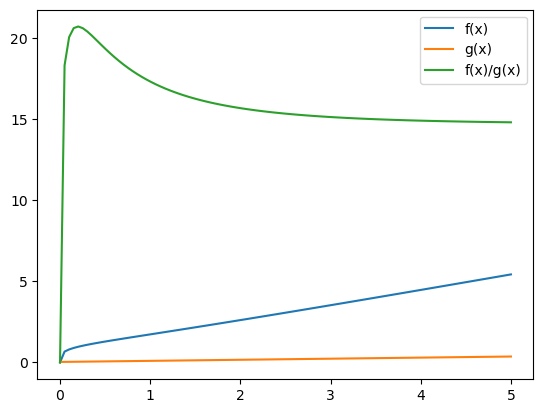

In [6]:
f = lambda x: np.sqrt(x**2+2*np.sqrt(x))
g = lambda x: (x+0.5)/15

x = np.linspace(0, 5, 100)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, g(x), label='g(x)')
plt.plot(x, f(x)/g(x), label='f(x)/g(x)')

plt.legend()
plt.show()

In [10]:
I_0 = 15.4390107
for n in [10, 100, 1000, 10000, 100000, 1000000]:
    r = np.array([random.uniform(0, 1) for _ in range(n)])
    x = (np.sqrt(1+120*r)-1)/2
    I = np.sum(f(x)/g(x))/len(x)
    print("logN:{}   I={}  Error={}".format(math.log10(n), I, abs(I-I_0)))


logN:1.0   I=14.99244823174956  Error=0.4465624682504412
logN:2.0   I=15.308906367465376  Error=0.13010433253462494
logN:3.0   I=15.408884317968564  Error=0.030126382031436805
logN:4.0   I=15.433195226352595  Error=0.005815473647405867
logN:5.0   I=15.438346405053604  Error=0.0006642949463966374
logN:6.0   I=15.43896477704112  Error=4.592295888095066e-05


### 多重积分计算

In [3]:
#f = lambda x,y,z,u,v: 5+x**2-y**2+3*x*y-z**2+u**3-v**3
end = [7/10, 4/7, 9/10, 2, 13/11]
I_0 = 5.6771209 #精确值

for n in [10, 100, 1000, 10000, 100000]:
    x = np.array([random.uniform(0, 7/10) for _ in range(n)])
    y = np.array([random.uniform(0, 4/7) for _ in range(n)])
    z = np.array([random.uniform(0, 9/10) for _ in range(n)])
    u = np.array([random.uniform(0, 2) for _ in range(n)])
    v = np.array([random.uniform(0, 13/11) for _ in range(n)])
    element = [x,y,z,u,v]

    #对分离开来的变量分别计算加和
    sum = 5 + np.sum(x**2)/n - np.sum(y**2)/n - np.sum(z**2)/n + np.sum(u**3)/n - np.sum(v**3)/n
    for i in range(n):
        sum += np.sum(3*x[i]*y)/(n**2)

    I = sum
    for i in range(5):
        I = I*end[i]
    
    print("logN:{}   I={}  Error={}".format(5*math.log10(n), I, abs(I-I_0)))


logN:5.0   I=5.822434198754628  Error=0.14531329875462795
logN:10.0   I=5.770109662759711  Error=0.09298876275971057
logN:15.0   I=5.627478768295804  Error=0.0496421317041964
logN:20.0   I=5.691845045723662  Error=0.014724145723661763
logN:25.0   I=5.680166877489928  Error=0.0030459774899274095
